<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/00_Introduccion/02_ComplejidadConvergencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complejidad y Convergencia 
Profesor: M.en.C. Miguel Angel Pérez León.

Ayudante: Jesús Iván Coss Calderón.

Materia: Análisis Numérico.

##  Introducción

Un **algoritmo** es un procedimiento que describe, sin ambiguedad, una serie finita de pasos a realizar en un orden especifico.

La finalidad de un algoritmmo es poner en prática algún procedimiento para resolver un problema o **aproximarse a una solución** del problema.

**Pseudocódigo** es la forma de representar un algoritmo, sin tener que emplear algún lenguaje de programación en especifico, pero lo suficientemente cercano a este, para que pueda escribirse en un lenguaje de programación con un par de cambios (como el pseudocódigo del algoritmo de Horner).

Este pseudocódigo especifica la forma de la entrada por proporcionar y la forma de salida deseada.

### Suma de los N primeros naturales

No todos los algoritmos numéricos devuelven un resultado
satisfactorio, para una entrada elegida.

Como consecuencia, en cada algoritmo se incorpora alguna técnica
(condición) para saber cuando es que debe detenerse,
independientemente del método numérico empleado, esto con la
finalidad de **evitar ciclos infinitos**.

#### Ejemplo

Escriba el algoritmo para sumar los primeros n numeros naturales.

$$\sum_{i=1}^{n}i$$

In [ ]:
n=int(input("Ingrese el numero hasta el cual se quiere sumar\n"))
suma=0
# la funcion range toma hasta un numero antes de n
for i in range(n+1):
    suma+=i

print("La suma es: {}".format(suma))

Ingrese el numero hasta el cual se quiere sumar
5
La suma es: 15


Otra tipo de algoritmos son los que describen un procedimiento en
términos matemáticos, como lo son las **series de Taylor**.

### Serie de Taylor

Es una serie finita de potencias que representa de manera exacta una función $f (x)$ al rededor de un punto $x = c$, siempre y cuando $n$ sea suficientemente "grande".

$$ f(x) = f(c) + f^{'}(c)(x-c) + \frac{f^{''}(c)(x-c)^{2}}{2!} + \dots + \frac{f^{n}(c)(x-c)^{n}}{n!} $$

Si $c = 0$ se trata de la serie de Maclurin.

Esta aproximación de $f (x)$ se conoce como la aproximación de $f (x)$
en series de Taylor y dependiendo la derivada sera el grado del
polinomio de Taylor. Cabe recalcar, que a mayor grado del polinomio
de Taylor sera mayor la exactitud de la aproximación.

#### Ejemplo

Obtenga los seis primeros términos de la serie de Taylor para $f(x)= e^{x}$ alrededor del cero.

**Solución**:
    
Al obtener las primeras 5 derivadas de la función se tiene 

$$f(x)= f^{1}(x)=f^{2}(x)=f^{3}(x)=f^{4}(x)=f^{5}(x)= e^{x}$$

Posteriormente se evalua en el punto cero ($x=c=0$ )

$$f(0)= f^{1}(0)=f^{2}(0)=f^{3}(0)=f^{4}(0)=f^{5}(0)= e^{0}=1$$

Lo que da como resultado la siguiente expresión, que representa el
polinomio de Taylor de $e^{x}$ al rededor del punto 0.

$$ f(x) \approx 1 + x + \frac{x^{2}}{2!}+ \frac{x^{3}}{3!}+ \frac{x^{4}}{4!}+ \frac{x^{5}}{5!} + \dots  $$

**Solución en python**:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.interpolate import approximate_taylor_polynomial
from IPython.html.widgets import interact
import ipywidgets as widgets

#@interact(grado=(0,10))
def Taylor(grado):
    x = np.linspace(-10.0, 10.0, num=100)
    plt.plot(x, np.exp(x), label="función exponencial",color='blue')
    aprox_taylor = approximate_taylor_polynomial(np.exp, 0, grado, 1\
                                               ,order=grado+2)
    plt.plot(x, aprox_taylor(x), label="Aproximación de Taylor de grado " +str(grado),color='black')
    plt.axis([-10, 10, -10, 10])
    plt.legend()
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")
    plt.title("Aproximación de Taylor ")
    plt.grid()

interact(Taylor,grado=widgets.IntSlider(min=0,max=10,step=1,value=0))

interactive(children=(IntSlider(value=0, description='grado', max=10), Output()), _dom_classes=('widget-intera…

<function __main__.Taylor>

De tal manera que la siguiente expresión, se aproxima con 6
terminos a $e^{x}$ al rededor del punto 0.

$$ f(x) \approx 1 + x + \frac{x^{2}}{2!}+ \frac{x^{3}}{3!}+ \frac{x^{4}}{4!}+ \frac{x^{5}}{5!} + \dots  $$

**Ejercicio**:

Si se sabe que el valor exacto de $e^{0.5} = 1.6487212707$. Calcula
el error relativo porcentual que se comete si se trunca la serie en
seis términos. Emplea 6 decimales.

**Solución en python**:

In [ ]:
import pandas as pd 

def ErrorTaylor(x):
    ordenes=np.arange(6)
    aprox_taylor=np.array([0.0]*6)
    func_eval=np.zeros(6)
    error=np.zeros_like(aprox_taylor)
    for degree in ordenes:
        PolTaylor = approximate_taylor_polynomial(np.exp, 0, degree, 1,order=degree+2)
        aprox_taylor[degree]=PolTaylor(x)
        func_eval[degree]=np.exp(x)
        error[degree]=np.abs((aprox_taylor[degree]-func_eval[degree])/func_eval[degree])
        
    data={"Termino":[1,2,3,4,5,6],"aproximacion":aprox_taylor,
          "valor real":func_eval,"error":error    
    }
    tabla=pd.DataFrame(data)
    return tabla

In [ ]:
ErrorTaylor(0.5)

,Termino,aproximacion,valor real,error
0,1,0.944804,1.648721,0.426947
1,2,1.486893,1.648721,0.098154
2,3,1.623448,1.648721,0.015329
3,4,1.645711,1.648721,0.001826
4,5,1.648429,1.648721,0.000177
5,6,1.648697,1.648721,0.000015


##  Complejidad Computacional

Para poder desarrollar algoritmos eficientes y que den resultados
útiles es necesario emplear algunas herramientas para su análisis.

**Definición de Complejidad Computacional**:

Es la rama de las ciencias de la computación que estudia de manera teórica, la optimización de los recursos requeridos durante la ejecución de un algoritmo.

El análisis se basa en 2 aspectos: el tiempo y el espacio.

El tiempo es el periodo transcurrido entre el inicio y la
finalización del algoritmo.

El espacio es la cantidad de memoria (la medida varia según la
máquina) que necesita el algoritmo para su ejecución.

**Complejidad Computacional $T(n)$**

Es el número de operaciones elementales (*en el caso de análisis
numérico las FLOP’s*) en función de la medida n (tamaño de los
datos).

¿Como se mide?. Una vez que se tiene el algoritmo en forma de
pseudocódigo, se puede dar una estimación de cuantas operaciones
elementales se realizan en función de la entrada n.

Sea cual sea el algoritmo, para llevar a cabo el análisis de la
complejidad de dicho algoritmo, normalmente se toma en cuenta dos
posibles casos: el peor caso y el caso promedio.

**Peor Caso**: se calcula $T(n)$ asumiendo que n es la ”peor” de todas o
que de los posibles casos al ejecutar el algoritmo, se cae en el peor de
ellos.

**Caso Promedio**: se calcula promediando el tiempo (o espacio)
empleado para cada una de las entradas posibles.



## Cota Superior Asintótica

Cota superior asintótica: En el análisis de algoritmos una cota superior asintótica es una
función que sirve de cota superior de otra función cuando el
argumento tiende a infinito.

Usualmente se utiliza la notación Landau $O(g(x))$, orden de
$g(x)$, o coloquialmente se llama ”Notación O Grande”, para
referirse a las funciones acotadas superiormente por la función
$g(x)$

### Definición.
Cota superior asintótica: sea $g\left(x\right)$ una función continua y $f\left(x\right)$ la función que describe el comportamiento de nuestro algoritmo, diremos que $f$ pertenece al orden $g$ si.

$$O\left(g\left(x\right)\right)=\left\{ f\left(x\right)\colon\exists\,x_{0},c>0\mid\forall x\geq x_{0}>0\colon0\leq\left|f\left(x\right)\right|\leq c\left|g\left(x\right)\right|\right\} $$

En el análisis de algoritmos una cota superior asintótica es una función que sirve de cota superior de otra función cuando el argumento tiende a infinito.

Normalmente se utiliza la notación Landau $O(g(x))$, orden de $g(x)$, o coloquialmente se llama ”Notación O Grande”, para referirse a las funciones acotadas superiormente por la función $g(x)$

![Asintotica](https://docs.google.com/uc?export=download&id=1XaFRdeBPTpkjAVhCLXvxmByo8Rx4pt8t)

Como te podrás dar cuenta, la cota superior asintótica nos sirve
para definir categorías (orden de complejidad) dentro del
desempeño de los mucho algoritmos existentes. Y esto sirve
para poder identificar cuales algoritmos son mas eficientes que
otros.




| orden de Complejidad        | Nombre            | 
| :-:           |    :-:        | 
| $O(1) $       | Orden constante | 
| $O(log n) $   | Orden logarítmico     |
| $O(n) $       | Orden lineal      |
| $O(n log n) $ | Orden n log n      | 
| $O( n^{2}) $  | Orden cuadrático      | 
| $O( n^{a}) $  | Orden polinomial ($a>2$)     | 
| $O( a^{n}) $  | Orden exponencial ($a>2$)     | 
| $O( n!)    $  | Orden factorial      | 

A continuación se muestra las cotas (categorias) mas comúnes.


![Complejidad](https://docs.google.com/uc?export=download&id=1hF0sx5SPkF1wf6fwhqfr_KNFXxSooXHu)

##  Estabilidad de algoritmos

Los algoritmos de interés para el análisis numérico, son aquellos
que produzcan resultados precisos.

Uno de los criterios que siempre se tratan de imponer sobre un
algoritmo, es que los cambios pequeños en los datos iniciales,
produzcan otros correspondientes en los resultados finales. Un
algoritmo que satisfaga esta propiedad es **estable**, en caso
contrario es **inestable**.

Algunos algoritmos solo son estables para ciertas elecciones de
datos iniciales; a estos se les llama condicionalmente estables.

A lo largo del curso analizaremos algoritmos tanto estables,
como inestables y condicionalmente estables.

Los algoritmos de interés para el análisis numérico, son aquellos
que produzcan resultados precisos.

Uno de los criterios que siempre se tratan de imponer sobre un
algoritmo, es que los cambios pequeños en los datos iniciales,
produzcan otros correspondientes en los resultados finales. Un
algoritmo que satisfaga esta propiedad es estable, en caso
contrario es **inestable**.

Algunos algoritmos solo son estables para ciertas elecciones de
datos iniciales; a estos se les llama condicionalmente estables.

A lo largo del curso analizaremos algoritmos tanto estables,
como inestables y condicionalmente estables.


##  Crecimiento del error

Supongamos que al momento de ejecutar un algoritmo se genera un error inicial $E_{0} > 0$ en cierta
etapa de los cálculos y $E_{n}$ repesenta la magnitud del error
después de $n$ operaciones sucesivas. Los 2 casos que surgen con mas
frecuencia en la práctica se definen como sigue:


### Definición

Crecimiento del error: Si $E_{n} \approx C_{n} E_{0} $ donde $C$ es una constante independiente de $n$, entonces se dice que el crecimiento del error es lineal. Si $E_{n} \approx C^{n} E_{0} $ para alguna $C>1$, entonces el crecimiento del error se denomina exponencial.

Normalmente el crecimiento lineal es inevitable y, cuando $C$ y $E_{0}$ son pequeños, por lo general los resultados son aceptables. Por otro lado hay que evitar el crecimiento exponencial del error, ya que el termino $C^{n}$ crece incluso para valores de n relativamente pequeños.

En consecuencia un algoritmo con un crecimiento lineal del error es estable, pero no un algoritmo con crecimiento exponencial del error ya que se considera inestable.



![Crecimiento](https://docs.google.com/uc?export=download&id=1ikGd8jMYQaiZkDlFNV5x7oGBr79Rddvw)

## Convergencia

Una de las maneras de determinar que tan bueno es un algoritmo en
comparación con otro es mediante la rapidez de convergencia, la cual nos
indica cuál de los 2 algoritmos comparados encontrara una solución de
manera mas rápida.

### Definición

Convergencia de suceciones: decimos que la sucesión $\{a_n\}$ converge a número real $a$ si y sólo si para toda $ \epsilon > 0$ existe un número natural $N$ tal que si $n > N$ entonces $|a_n - a| < \epsilon$. Si la sucesión $\{a_n\}$ converge a $a$, decimos que el límite de la sucesión $\{a_n\}$ es $a$ y escribimos $\underset{n\rightarrow\infty}{lim}a_{n}=a$. De
otro modo, la sucesión se denomina divergente.

### Ejemplo
La sucesión $\frac{1}{n}$ converge a cero, esto es, $\underset{n\rightarrow\infty}{lim} \frac{1}{n} = 0$

En la siguiente gráfica podemos observar que efectivamente ocurre esto:

Cloning into 'Prueba_lectura'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


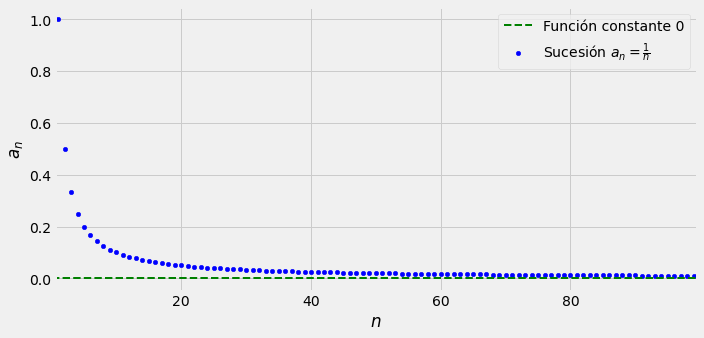

In [ ]:
# importamos bibliotecas necesarias para graficar
!git clone https://github.com/joiortega1/Prueba_lectura.git
import os
os.listdir('Prueba_lectura')
import Prueba_lectura.gutils
import Prueba_lectura.gutils as vis

# se genera la sucesion de valores
num_suc = np.arange(1,100)
sucesion2 = [1/i for i in num_suc]

# parametros para graficar
par = [{'xlabel':'$n$',
        'ylabel':'$a_n$',
       'xlim':(0.5,99.5)},
       ]
# se genera la grafica
graf = vis.planoCartesiano(par=par)
graf.scatter(x = num_suc, y = sucesion2, 
             par={'s':20,'color':'blue', 'label':r'Sucesión $a_n=\frac{1}{n}$'})
graf.plot(x=[0,100],y=[0,0], par={'c':'green','linestyle':'--', 'lw':2,'label':'Función constante 0'})
graf.legend()
graf.show()

## Rapidez de convergencia

Otra de las medidas importantes en el análisis de algoritmos y en el análisis numérico es la rapidez de convergencia. Esta metrica nos da un parámetro para determinar que tan rápido es un algortimo comparado con otro.

### Definición

Rapidez de Convergencia: Supongamos que $\{ \beta_{n} \}_{n=1}^{\infty}$ es una sucesión cuyo valor de convergencia es cero y que $\{ \alpha_{n} \}_{n=1}^{\infty}$ converge a un número $\alpha$. Si existe una constante positiva K tal que 

$$ | \alpha_{n} -\alpha | \leq K | \beta_{n}  |$$

para n suficientemente grande, entonces decimos que $\{ \alpha_{n} \}_{n=1}^{\infty}$ converge a $\alpha$ con rapidez de convergencia $ O(\beta_{n})$.

Esta expresión se lee ”O mayúscula de $\beta_{n}$”. Se indica escribiendo $ \alpha_{n} = \alpha + O(\beta_{n})$.

Aunque esta definición permite comparar $\{ \alpha_{n} \}_{n=1}^{\infty}$ con cualquier sucesión en casi todas las situaciones emplearemos

$$\beta_{n} = \frac{1}{n^{p}} $$

para algún $p > 0$. Por lo general, buscaremos el mayor valor de $p$ tal que $ \alpha_{n} = \alpha + O( 1/n^{p})$.

### Ejemplo

Suponga que para $n \geq 1$,

$$ \alpha_{n} = \frac{n+1}{n^{2}} \hspace{1.5mm}\text{y} \hspace{2mm}\tilde{\alpha_{n}}=\frac{n+3}{n^{3}}$$

Encontrar cual de las dos sucesiones converge mas rápido a cero.

**Solución**.

Aunque $\underset{n\rightarrow\infty}{lim}\alpha_{n}=0$   , la sucesión $\{\tilde{\alpha_{n}}\}_{n=1}^{\infty}$ converge en este límite mucho más rápido que la suceción  $\{ \alpha_{n} \}_{n=1}^{\infty}$, usando aritmética de redondeo a cinco cifras, se puede apreciar en la siguiente tabla este comportamiento.

| n        | 1            |  2 | 3|4 |5 |6 |7 |
| :-:  | :-: | :-: |  :-: | :-:  |   :-: |   :-: |  :-: | 
| $\alpha_{n} $  | 2.00000 |0.75000 |0.44444 |0.31250 |0.24000 |0.19444 |0.16237|
| $\tilde{\alpha_{n}} $ | 4.00000 |0.65500    |0.22222 | 0.10938|0.64000 |0.04166 |0.0915|


Si $\{ \beta_{n} \}_{n=1}^{\infty}=1/n \quad$    y     $\quad\{\tilde{\beta_{n}}\}_{n=1}^{\infty}=1/n^{2}$ , vemos que 

$$ | \alpha_{n} -0 |= \frac{n+1}{n^{2}} \leq \frac{n+n}{n^{2}}= 2 \frac{1}{n} = 2 \beta_{n}$$

y

$$ | \tilde{\alpha_{n}} -0 |= \frac{n+3}{n^{3}} \leq \frac{n+3n}{n^{3}}= 4 \frac{1}{n^{2}} = 4 \tilde{\beta_{n}}\$$

de modo que 

$$ \alpha_{n} = 0+ O( \frac{1}{n} ) \hspace{1.5mm}\text{y} \hspace{2mm} \tilde{\alpha_{n}}= 0+ O( \frac{1}{n^{2}} ) $$

La rapidez de convergencia de $\{ \alpha_{n} \}_{n=1}^{\infty}$ a cero es similar a la convergencia de $\{ 1/n \}$ a cero, mientras que la rapidez de convergencia de $\{\tilde{\alpha_{n}}\}_{n=1}^{\infty}$ a cero es similar a la convergencia de $\{ 1/n^{2} \}$, la cual converge más rápido.

También se emplea la notación ”O mayúscula” para describir la
rapidez de convergencia de funciones.


## Referencias
1. Riswan Butt: Numerical Analysis Using Matlab, Jones and Barlett.
2. Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.
3. Richard L. Burden, J, Douglas Faires: Análisis Numérico, Math Learning.
4. Proyecto PAPIME PE101019: notebook Sucesiones


